In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


In [59]:
#importing dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [60]:
print("size of training data ",x_train.shape[0])
print("size of test data ",x_test.shape[0])

size of training data  60000
size of test data  10000


In [61]:
print("shape of an image " ,x_train[0].shape)

shape of an image  (28, 28)


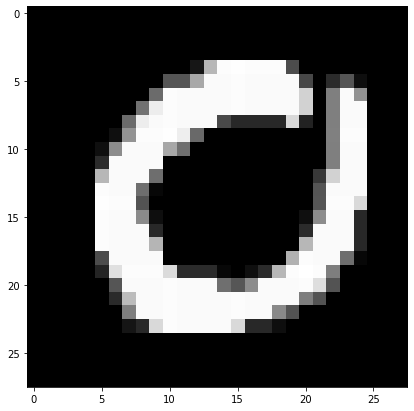

The above digit is 0


In [62]:
#display or plot a number
plt.figure(figsize =(7,7))
idx=random.randint(0,255)

#cextracting image from the numpy array
grid_data = x_train[idx]

plt.imshow(grid_data, interpolation ='none',cmap='gray')
plt.show()
print('The above digit is ' + str(y_train[idx]))

In [83]:
#reshape to 784 dim
x_train = x_train.flatten().reshape(60000,784)
x_test = x_test.flatten().reshape(10000,784)

print('shape of training data ', x_train.shape)
print('shape of test data ', x_test.shape)

shape of training data  (60000, 784)
shape of test data  (10000, 784)


In [68]:
#before training the neural network, we should always remove mean and set variance to 1 of our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Sigmoid activation

                        Architecture
      input(784)>> layer_1(128, Sigmoid) >> layer_2(64,Sigmoid) >> dropout(0.3) >> layer_3(10, None) >> Softmax

In [87]:
#model with sigmoid activations

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(784),
  tf.keras.layers.Dense(128, activation='sigmoid', kernel_initializer=tf.keras.initializers.RandomNormal(stddev=2/(912))),
  tf.keras.layers.Dense(64, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal(stddev=2/(192))),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=2/(74))),
  tf.keras.layers.Softmax()
])


In [88]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.08789904, 0.09207291, 0.08100266, 0.10422133, 0.10315093,
        0.10505939, 0.10375583, 0.10476438, 0.11432635, 0.10374717]],
      dtype=float32)

In [89]:
#loss by a random model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


2.2975693

In [90]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [95]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4869 - accuracy: 0.9764
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4852 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4831 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4818 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4808 - accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4799 - accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4791 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4781 - accuracy: 0.9846
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4779 - accuracy: 0.9845
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.476

In [96]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4985 - accuracy: 0.9634


[1.4985346794128418, 0.9634000062942505]

In [98]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
_________________________________________________________________
softmax_5 (Softmax)          (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


#Relu activation

                        Architecture
      input(784)>> layer_1(128, Relu) >> layer_2(64,Relu) >> dropout(0.3) >> layer_3(10, None) >> Softmax

In [99]:
#model with Relu activations

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(784),
  tf.keras.layers.Dense(128, activation= 'relu', kernel_initializer=tf.keras.initializers.RandomUniform(minval = -0.087, maxval= 0.087)),
  tf.keras.layers.Dense(64, activation= 'relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval= - 0.216, maxval = 0.216)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.RandomUniform(minval= -0.306, maxval= 0.306)),
  tf.keras.layers.Softmax()
])


In [100]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [101]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5730 - accuracy: 0.8929
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5228 - accuracy: 0.9394
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5156 - accuracy: 0.9460
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5089 - accuracy: 0.9528
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5061 - accuracy: 0.9553
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5031 - accuracy: 0.9581
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5026 - accuracy: 0.9586
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5021 - accuracy: 0.9589
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5007 - accuracy: 0.9602
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.499

In [102]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4956 - accuracy: 0.9654


[1.4955565929412842, 0.965399980545044]

In [103]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
_________________________________________________________________
softmax_6 (Softmax)          (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
